In [1]:
import numpy as np
import wfdb

In [2]:
def get_beats(beat,records, listX,listY,ind):
    
    for e in records:
        signals, fields = wfdb.rdsamp(e, channels = [0]) 
        ann = wfdb.rdann(e, 'atr')
        ids = np.in1d(ann.symbol, beat)
        imp_beats = ann.sample[ids]
        beats = (ann.sample)
        for i in imp_beats:
            beats = list(beats)
            j = beats.index(i)
            if(j!=0 and j!=(len(beats)-1)):
                x = beats[j-1]
                y = beats[j+1]
                diff1 = abs(x - beats[j])//2
                diff2 = abs(y - beats[j])//2
                listX.append(list(signals[beats[j] - diff1: beats[j] + diff2, 0]))
                #listY.append(ind)
                listY.append(beat[0])
                

In [3]:

ecg_beats = [['N'],['L'],['R'],['A'],['V'],['/'],['E'],['!'] ]
ecg_beats_dir = ['NOR','LBB','RBB','APC','PVC','PAB','VEB','VFW' ]
records = [['100','101','102','103','104','105','106','107','108','109','111','112','113','114','115','116','117','118','119','121','122','123','124','200','201','202','203','205','207','208','209','210','212','213','215','217','219','220','221','222','223','228','230','231','232','233','234'],
           ['100','101','102','103','104','105','106','107','108','109','111','112','113','114','115','116','117','118','119','121','122','123','124','200','201','202','203','205','207','208','209','210','212','213','215','217','219','220','221','222','223','228','230','231','232','233','234'],
           ['100','101','102','103','104','105','106','107','108','109','111','112','113','114','115','116','117','118','119','121','122','123','124','200','201','202','203','205','207','208','209','210','212','213','215','217','219','220','221','222','223','228','230','231','232','233','234'],
           ['100','101','102','103','104','105','106','107','108','109','111','112','113','114','115','116','117','118','119','121','122','123','124','200','201','202','203','205','207','208','209','210','212','213','215','217','219','220','221','222','223','228','230','231','232','233','234'],
           ['100','101','102','103','104','105','106','107','108','109','111','112','113','114','115','116','117','118','119','121','122','123','124','200','201','202','203','205','207','208','209','210','212','213','215','217','219','220','221','222','223','228','230','231','232','233','234'],
           ['100','101','102','103','104','105','106','107','108','109','111','112','113','114','115','116','117','118','119','121','122','123','124','200','201','202','203','205','207','208','209','210','212','213','215','217','219','220','221','222','223','228','230','231','232','233','234'],
           ['100','101','102','103','104','105','106','107','108','109','111','112','113','114','115','116','117','118','119','121','122','123','124','200','201','202','203','205','207','208','209','210','212','213','215','217','219','220','221','222','223','228','230','231','232','233','234'],
           ['100','101','102','103','104','105','106','107','108','109','111','112','113','114','115','116','117','118','119','121','122','123','124','200','201','202','203','205','207','208','209','210','212','213','215','217','219','220','221','222','223','228','230','231','232','233','234']]    


listX = []
listY = []
for i in range(8):
    get_beats(ecg_beats[i],records[i],listX,listY,i)



In [6]:
for i in range(len(listX)):
    if(len(listX[i])>250):
        listX[i]=listX[i][0:250]       ## changed from 480 to 320 to 200
    else:
        le = len(listX[i])
        le = 250-le
        for j in range(le):
            listX[i].append(0)
        

In [7]:
len(listY)

105362

In [8]:
type(listX)

list

In [9]:
X_prepared = np.array(listX)
Y_prepared = np.array(listY)

In [10]:
print(X_prepared.shape, Y_prepared.shape)
print(X_prepared[:5])

(105362, 250) (105362,)
[[-0.285 -0.275 -0.275 ...  0.     0.     0.   ]
 [-0.26  -0.275 -0.28  ... -0.455 -0.47  -0.475]
 [-0.31  -0.295 -0.29  ... -0.415 -0.395 -0.395]
 [-0.32  -0.32  -0.32  ... -0.32  -0.315 -0.32 ]
 [-0.315 -0.31  -0.315 ... -0.42  -0.405 -0.38 ]]


In [11]:
Y_prepared

array(['N', 'N', 'N', ..., '!', '!', '!'], dtype='<U1')

In [12]:
X_prepared = X_prepared.reshape((X_prepared.shape[0],X_prepared.shape[1],1))

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
Y_prepared = le.fit_transform(Y_prepared)
Y_prepared = to_categorical(Y_prepared, 8)
(trainX, testX, trainY, testY) = train_test_split(X_prepared,Y_prepared, test_size=0.25, random_state=500)
print(Y_prepared)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [14]:
len(testX[0])

250

In [15]:
testY[6]

array([0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [16]:
# scaler = StandardScaler()
# trainX = scaler.fit_transform(trainX)
# testX = scaler.transform(testX)

In [17]:
np.save('trainX.npy', trainX)
np.save('testX.npy', testX)
np.save('trainY.npy', trainY)
np.save('testY.npy', testY)
np.save('classes.npy', le.classes_)

In [18]:
import keras
from keras import optimizers, losses, activations, models
from keras.layers import Conv1D , MaxPooling1D , Dense ,Activation, Dropout ,GlobalMaxPooling1D , Input , Flatten
from keras.optimizers import Adam
from keras import layers 

In [19]:
model = keras.Sequential()
model.add(keras.Input(shape=(250,1)))   #320-200

model.add(layers.Conv1D(16, kernel_size=3 ,activation=activations.relu, name='Conv_C1'))
#model.add(Activation(activation='relu', name='relu_C1'))
model.add(layers.MaxPooling1D(pool_size=2))  
model.add(layers.Dropout(rate=0.1,name='Dropout_C1'))

model.add(layers.Conv1D(32, kernel_size=3,activation=activations.relu, name='Conv_C2'))
#model.add(Activation(activation='relu', name='relu_C2'))
model.add(layers.MaxPooling1D(pool_size=2))  ## increase pool size 
model.add(layers.Dropout(rate=0.1,name='Dropout_C2'))

#model.add(layers.Conv1D(32, kernel_size=3))
#model.add(Activation(activation='relu', name='relu3'))
model.add(layers.MaxPooling1D(pool_size=3))
model.add(layers.Dropout(rate=0.1,name='Dropout_C21'))

model.add(layers.Conv1D(8, kernel_size=3,activation=activations.relu, name='Conv_C3')) ## changed from 64 to 8
#model.add(Activation(activation='relu', name='relu_C3'))
model.add(layers.Flatten())                     
model.add(layers.Dropout(rate=0.2,name='Dropout_C3'))

model.add(layers.Dense(8,name='Dense_D1',activation='relu'))
#model.add(Activation(activation='relu', name='relu_D1'))

model.add(layers.Dense(16,name='Dense_D2',activation='relu'))
#model.add(Activation(activation='relu', name='relu_D2'))

model.add(layers.Dense(8,name='Dense_D3',activation='softmax'))
#model.add(Activation(activation='softmax', name='softmax'))

opt = optimizers.Adam(0.001)
model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_C1 (Conv1D)             (None, 248, 16)           64        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 124, 16)           0         
_________________________________________________________________
Dropout_C1 (Dropout)         (None, 124, 16)           0         
_________________________________________________________________
Conv_C2 (Conv1D)             (None, 122, 32)           1568      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 61, 32)            0         
_________________________________________________________________
Dropout_C2 (Dropout)         (None, 61, 32)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 20, 32)            0

In [20]:
# model = keras.Sequential()
# model.add(keras.Input(shape=(480,1)))
# model.add(layers.Conv1D(16, kernel_size=5, activation=activations.relu))


# model.add(layers.Conv1D(16, kernel_size=5, activation=activations.relu))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Dropout(rate=0.1))

# model.add(layers.Conv1D(32, kernel_size=3, activation=activations.relu))
# model.add(layers.Conv1D(32, kernel_size=3, activation=activations.relu))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Dropout(rate=0.1))

# model.add(layers.Conv1D(32, kernel_size=3, activation=activations.relu))
# model.add(layers.Conv1D(32, kernel_size=3, activation=activations.relu))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Dropout(rate=0.1))

# model.add(layers.Conv1D(256, kernel_size=3, activation=activations.relu))
# model.add(layers.Conv1D(256, kernel_size=3, activation=activations.relu))
# #model.add(layers.GlobalMaxPooling1D())
# model.add(layers.Flatten())
# model.add(layers.Dropout(rate=0.2))

# model.add(layers.Dense(256, activation=activations.relu))
# model.add(layers.Dense(256, activation=activations.relu))
# model.add(layers.Dense(8,activation=activations.softmax))

# opt = optimizers.Adam(0.001)
# model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['accuracy'])


# model.summary()

In [21]:
model.fit(trainX ,trainY ,batch_size = 128 ,epochs = 1,)

618/618 [==============================] - 16s 26ms/step - loss: 0.8203 - accuracy: 0.7519


In [22]:
score = model.evaluate(testX , testY , batch_size = 128)

206/206 [==============================] - 1s 7ms/step - loss: 0.4901 - accuracy: 0.8562


In [23]:
model.metrics_names

['loss', 'accuracy']

In [24]:
score

[0.49012601375579834, 0.8562317490577698]

In [25]:
model.save('ecg4btp_model.h5')


### BTP 2.0

In [26]:
# from tensorflow.keras.models import load_model
#model = load_model('model_11/ECG4btp.h5')

In [27]:
import os
os.environ['PATH'] = '/opt/Xilinx/Vivado/2019.2/bin:' + os.environ['PATH']

In [28]:
le.classes_

array(['!', '/', 'A', 'E', 'L', 'N', 'R', 'V'], dtype='<U1')

Accuracy: 0.8562317300026575


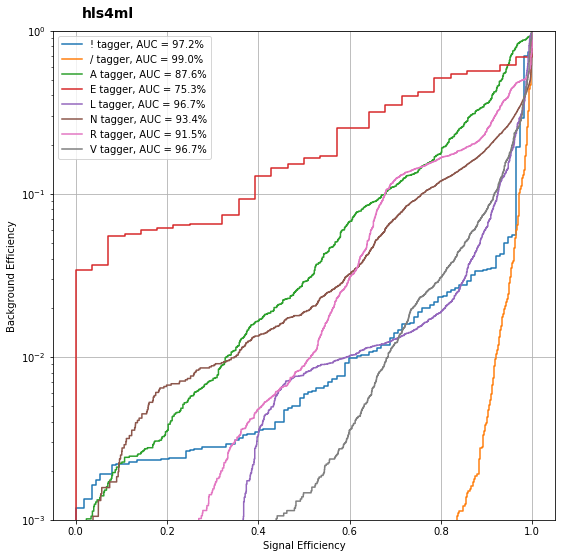

In [29]:
%matplotlib inline
import plotting
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
y_keras = model.predict(testX)
print("Accuracy: {}".format(accuracy_score(np.argmax(testY, axis=1), np.argmax(y_keras, axis=1))))
plt.figure(figsize=(9,9))
_ = plotting.makeRoc(testY, y_keras, le.classes_)

In [30]:


import hls4ml
config = hls4ml.utils.config_from_keras_model(model, granularity='name')
print("-----------------------------------")



Interpreting Sequential
Topology:
Layer name: input_1, layer type: Input
Layer name: Conv_C1, layer type: Conv1D
  -> Activation (relu), layer name: Conv_C1
Layer name: max_pooling1d, layer type: MaxPooling1D
Layer name: Conv_C2, layer type: Conv1D
  -> Activation (relu), layer name: Conv_C2
Layer name: max_pooling1d_1, layer type: MaxPooling1D
Layer name: max_pooling1d_2, layer type: MaxPooling1D
Layer name: Conv_C3, layer type: Conv1D
  -> Activation (relu), layer name: Conv_C3
Layer name: Dense_D1, layer type: Dense
  -> Activation (relu), layer name: Dense_D1
Layer name: Dense_D2, layer type: Dense
  -> Activation (relu), layer name: Dense_D2
Layer name: Dense_D3, layer type: Dense
  -> Activation (softmax), layer name: Dense_D3
-----------------------------------


In [31]:
config['Model']['ReuseFactor'] = 48
config['Model']['Strategy'] = 'Resource'
config['LayerName']['Conv_C1']['ReuseFactor'] = 48
config['LayerName']['Conv_C2']['ReuseFactor'] = 1536
config['LayerName']['Conv_C3']['ReuseFactor'] = 768

config['LayerName']['Dense_D1']['ReuseFactor'] = 1408
config['LayerName']['Dense_D2']['ReuseFactor'] = 128
config['LayerName']['Dense_D3']['ReuseFactor'] = 128




In [32]:
print("Configuration")
plotting.print_dict(config)
print("-----------------------------------")

Configuration
Model
  Precision:         ap_fixed<16,6>
  ReuseFactor:       48
  Strategy:          Resource
LayerName
  input_1
    Precision
      result:        ap_fixed<16,6>
  Conv_C1
    Precision
      weight:        ap_fixed<16,6>
      bias:          ap_fixed<16,6>
      result:        ap_fixed<16,6>
    ReuseFactor:     48
  Conv_C1_relu
    Precision:       ap_fixed<16,6>
    ReuseFactor:     1
    table_size:      1024
    table_t:         ap_fixed<18,8>
  max_pooling1d
    Precision:       ap_fixed<16,6>
  Conv_C2
    Precision
      weight:        ap_fixed<16,6>
      bias:          ap_fixed<16,6>
      result:        ap_fixed<16,6>
    ReuseFactor:     1536
  Conv_C2_relu
    Precision:       ap_fixed<16,6>
    ReuseFactor:     1
    table_size:      1024
    table_t:         ap_fixed<18,8>
  max_pooling1d_1
    Precision:       ap_fixed<16,6>
  max_pooling1d_2
    Precision:       ap_fixed<16,6>
  Conv_C3
    Precision
      weight:        ap_fixed<16,6>
      bias:   

In [33]:
#config['Model']['ReuseFactor'] = 50


In [34]:
# hls_model = hls4ml.converters.convert_from_keras_model(model,
#                                                        hls_config=config,
#                                                        output_dir='model_1/hls4ml_prj',
#                                                        fpga_part='xcu250-figd2104-2L-e')

# Xilinx_ZedBoard        xc7z020clg484-1
# Xilinx Virtex-7 FPGA   xc7vx690tffg1761-2


hls_model = hls4ml.converters.convert_from_keras_model(model,
                                                       hls_config=config,
                                                       output_dir='model_1/hls4ml_prj',
                                                       fpga_part='xc7vx690tffg1761-2')


Interpreting Sequential
Topology:
Layer name: input_1, layer type: InputLayer, current shape: [[None, 250, 1]]
Layer name: Conv_C1, layer type: Conv1D, current shape: [[None, 250, 1]]
Layer name: max_pooling1d, layer type: MaxPooling1D, current shape: [[None, 248, 16]]
Layer name: Conv_C2, layer type: Conv1D, current shape: [[None, 124, 16]]
Layer name: max_pooling1d_1, layer type: MaxPooling1D, current shape: [[None, 122, 32]]
Layer name: max_pooling1d_2, layer type: MaxPooling1D, current shape: [[None, 61, 32]]
Layer name: Conv_C3, layer type: Conv1D, current shape: [[None, 20, 32]]
Layer name: Dense_D1, layer type: Dense, current shape: [[None, 18, 8]]
Layer name: Dense_D2, layer type: Dense, current shape: [[None, 8]]
Layer name: Dense_D3, layer type: Dense, current shape: [[None, 16]]
Creating HLS model


In [35]:
import pydot
import graphviz
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


## Compile, predict


In [37]:
hls_model.compile()

Writing HLS project
Done


## Synthesize


In [ ]:
hls_model.build(csim=False)

## Reports


In [120]:
hls4ml.report.read_vivado_report('model_1/hls4ml_prj/')

Found 1 solution(s) in model_1/hls4ml_prj//myproject_prj.
Reports for solution "solution1":

C simulation report not found.
SYNTHESIS REPORT:
== Vivado HLS Report for 'myproject'
* Date:           Sun Mar 14 18:29:07 2021

* Version:        2019.2 (Build 2704478 on Wed Nov 06 22:10:23 MST 2019)
* Project:        myproject_prj
* Solution:       solution1
* Product family: virtexuplus
* Target device:  xcu250-figd2104-2L-e


== Performance Estimates
+ Timing: 
    * Summary: 
    +--------+---------+----------+------------+
    |  Clock |  Target | Estimated| Uncertainty|
    +--------+---------+----------+------------+
    |ap_clk  | 5.00 ns | 4.357 ns |   0.62 ns  |
    +--------+---------+----------+------------+

+ Latency: 
    * Summary: 
    +---------+---------+-----------+-----------+-----+-----+----------+
    |  Latency (cycles) |   Latency (absolute)  |  Interval | Pipeline |
    |   min   |   max   |    min    |    max    | min | max |   Type   |
    +---------+---------+---